# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/vrhughes/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 35 (delta 6), reused 2 (delta 2), pack-reused 23 (from 1)
Receiving objects: 100% (35/35), 1.95 MiB | 6.21 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
# import all the stuff
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

> not using these ones

---


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [4]:
# Question 2
# read in data
mam = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

# part 1: cross-tab treatment and breast_cancer_death, normalized and not
print(pd.crosstab(mam['treatment'], mam['breast_cancer_death']), '\n')
print(pd.crosstab(mam['treatment'], mam['breast_cancer_death'], normalize = True))


breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes
treatment                              
control              0.494295  0.005621
mammogram            0.494518  0.005566


> It looks like there is a very small chance you will be less likely to die of breat cancer if you get a mammogram.

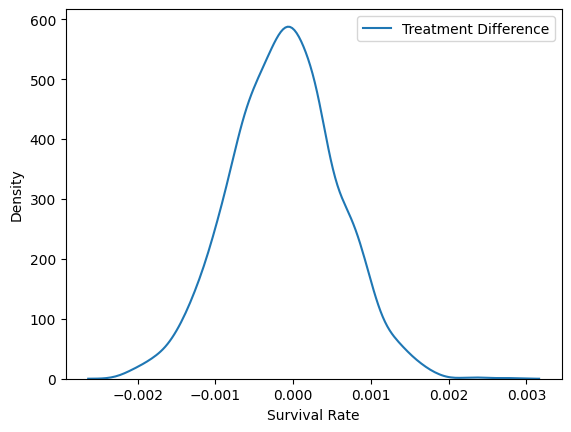

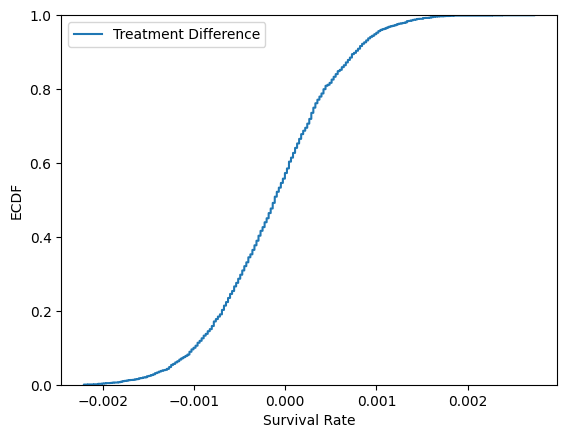

In [19]:
# Question 2
# part 2: compute the difference in 25-year survival rates between
# the control and mammogram groups

# setting num of iterations
its = 2500

# creating lists to store bootstrap results
mam['survive'] = 0
mam.loc[mam['breast_cancer_death'] == 'no', 'survive'] = 1
mam_treat = mam.loc[mam['treatment'] == 'mammogram', :]
mam_control = mam.loc[mam['treatment'] == 'control', :]
treatment_diff = []

# looping
for i in range(its):
  # resample data w replacement
  control = mam_treat.sample(mam_treat.shape[0], axis = 0, replace = True)
  treat = mam_control.sample(mam_control.shape[0], axis = 0, replace = True)

  # treatment diff
  diff = np.mean(treat['survive']) - np.mean(control['survive'])
  treatment_diff.append(diff)

# plotting
sns.kdeplot(treatment_diff, label = 'Treatment Difference')
plt.xlabel('Survival Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

# plotting part 2
sns.ecdfplot(treatment_diff, label = 'Treatment Difference')
plt.xlabel('Survival Rate')
plt.ylabel('ECDF')
plt.legend()
plt.show()

In [20]:
# Question 2
# construct a 99% confidence interval

level = 0.99
lower = np.quantile(treatment_diff, 0.005)
upper = np.quantile(treatment_diff, 0.995)

print('99% confidence interval: (', lower, ',', upper, ')')

99% confidence interval: ( -0.0018961438737241088 , 0.0016214596508914126 )


> The 99% CI does include 0. This implies that getting a mammogram does not have a statistically significant impact on 25 year survival rates.
> The data may exaggerate the ineffectiveness of mammograms because it is a small sample and mammograms can do more than prevent death, they can be essential when it comes to family planning and quality of life.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

In [21]:
# Question 4
# getting data
heart = pd.read_csv('/content/the_bootstrap/data/heart_hw.csv')
heart.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [24]:
# Question 4
# part 1: proport of people who survive in control who don't receive transplant
# b. diff between people who survive in treat and control

heart['treat'] = 0
heart['intercept'] = 1
heart.loc[heart['transplant'] == 'treatment', 'treat'] = 1

print(pd.crosstab(heart['transplant'], heart['y']), '\n')

# calcs
print("Proportion who survived in the control: ", 4/34, '\n')
print("Average treatment effect: ", 24/(69)-4/(34))

y            0   1
transplant        
control     30   4
treatment   45  24 

Proportion who survived in the control:  0.11764705882352941 

Average treatment effect:  0.23017902813299232


In [25]:
# Question 4
# part 2: regress y on transplant using linear model, how does const/intercept and coeff on transplant compare to part 1
from sklearn.linear_model import LinearRegression

y = heart['y']
X = heart.loc[:, ['intercept', 'treat']]

regr = LinearRegression(fit_intercept = False).fit(X, y)

print("Linear Regression Coeffs: ", regr.coef_)

Linear Regression Coeffs:  [0.11764706 0.23017903]


> The slope corresponds to the average treatment effect while the const corresponds to the proportion who survived in the control. Because of this, we can use the regression to analyze treatment/intervention and then bootstrap the regression coefficients.

In [27]:
# Question 4
# part 3: now include age
y = heart['y']
X2 = heart.loc[:, ['intercept', 'treat', 'age']]

regr2 = LinearRegression(fit_intercept = False).fit(X2, y)

print("Regression 2 Coeffs: ", regr2.coef_)

Regression 2 Coeffs:  [ 0.70195697  0.26470169 -0.01360722]


> Now that age is included we have taken care of some omitted variable(s) bias, this tells us that older people are less likely to survive an organ transplant (to be expected). Older people are probably also more likely to require a transplant (covar between treatment and omitted var is +). So OVB for age will be - and will see a decrease of the coeff on the treatment effect, which we see here.

<Axes: xlabel='age'>

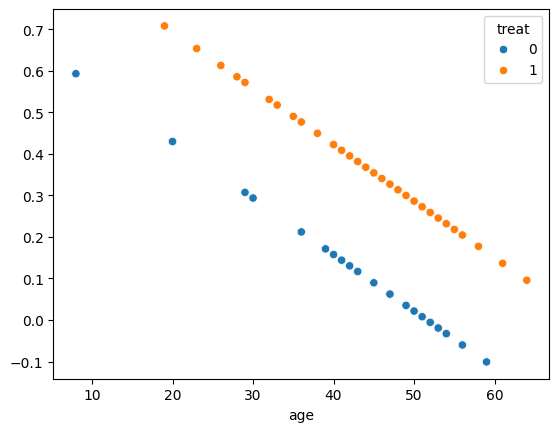

In [28]:
# Question 4
# part 4: build more flexible model that allows for non-line age effects and interactions
# between age and treatment. estimate the model and plot predicted survival prob by age,
# hued for people who receive a heart transplant and those who don't. Describe.

y_hat = regr2.predict(X2)
sns.scatterplot(x = 'age', y = y_hat, hue = 'treat', data = heart)

Regression Coeffs:  [-8.54714047e-01  5.86191756e-01  1.02563021e-01 -2.70227509e-03
  2.01932637e-05 -7.70114914e-03]


<Axes: xlabel='age'>

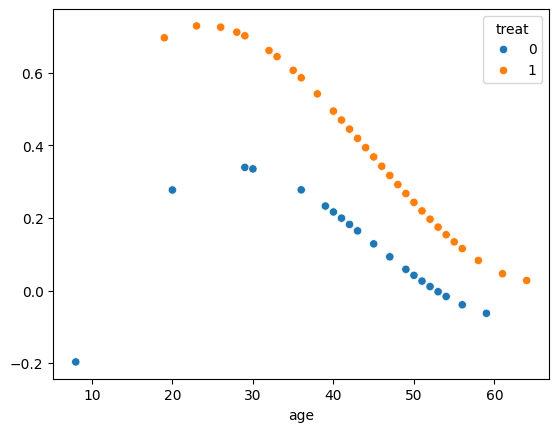

In [29]:
# Question 4
# part 4: Included age (and age squared and cubed) in order to control for age
# effects as well as a treatment dummy and an interaction between age and treatment
heart['treatXage'] = heart['treat']*heart['age']
heart['age_sqrd'] = heart['age']**2
heart['age_cubed'] = heart['age']**3
heart['treatXage_sqrd'] = heart['treat']*heart['age_sqrd']
heart['treatXage_cubed'] = heart['treat']*heart['age_cubed']

y = heart['y']
X = heart.loc[:, ['intercept', 'treat', 'age', 'age_sqrd', 'age_cubed', 'treatXage']]
reg = LinearRegression(fit_intercept = False).fit(X, y)
print("Regression Coeffs: ", reg.coef_)

y_hat = reg.predict(X)
sns.scatterplot(x = 'age', y = y_hat, hue = 'treat', data = heart)

> curvy!

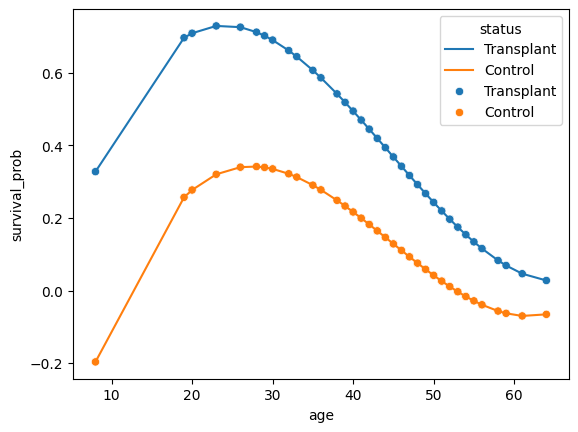

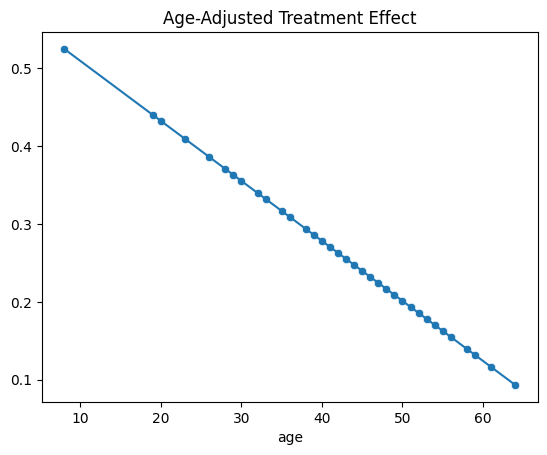

In [31]:
# Question 4
# part 4: estimating the model
X_all_transp = X
X_all_transp['treat'] = 1
X_all_transp['treatXage'] = X['age']
y_hat_transp = reg.predict(X_all_transp)

X_no_transp = X
X_no_transp['treat'] = 0
X_no_transp['treatXage'] = 0
y_hat_control = reg.predict(X_no_transp)

gdf_treat = pd.DataFrame({'survival_prob':y_hat_transp, 'age':X['age'], 'status':'Transplant'})
gdf_control = pd.DataFrame({'survival_prob':y_hat_control, 'age':X['age'], 'status':'Control'})
gdf = pd.concat([gdf_treat, gdf_control], axis = 0)

# plotting predicted survival prob by age
sns.lineplot(x = 'age', y = 'survival_prob', hue = 'status', data = gdf)
sns.scatterplot(x = 'age', y = 'survival_prob', hue = 'status', data = gdf)
plt.show()

age_adjusted_treatment_effect = y_hat_transp - y_hat_control
sns.lineplot(x = X['age'], y = age_adjusted_treatment_effect).set_title('Age-Adjusted Treatment Effect')
sns.scatterplot(x = X['age'], y = age_adjusted_treatment_effect)
plt.show()

> Seems like probability of survival peaks around ~23 and then declines as you age. However, very young people do not have a high chance of probability either (looks like an inverted parabola so to speak), noting that this is only one point though, but the thought behind it also backs this claim.

Question 5
> I think the idea of using models to select candidates for organ transplants is insane. I am sure a little bit of data analysis is good, but it definitely should not be the decider. I would be concerned on multiple levels. As I have seen taking care of my own aging grandparents, a lot of time those in the medical field will dismiss them as simply too old and sort of give up on them which is extremely frustrating, especially when they are in pain. I am not saying I know how patients should be selected, however I am almost 100% positive that a model created would be biased against those who are older and cause endless complications and potential suffering. Plus, since we saw that older people are more likely to need transplants that means if the model was "against" them more people would be suffering overall. It just seems like a terrible idea and very dismissive. I don't think any health/healthcare issue should ever decided sorely based on numbers.